# Imports

In [8]:
%load_ext autoreload
%autoreload 2

import torch
import datetime
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [361]:
df = pd.read_csv('training_data/AAPL.csv').drop(columns=['Adj Close'])
df.tail()

,Date,Open,High,Low,Close,Volume
1252,2023-10-05,173.789993,175.449997,172.679993,174.910004,48527900
1253,2023-10-06,173.800003,177.990005,173.179993,177.490005,57224100
1254,2023-10-09,176.809998,179.050003,175.800003,178.990005,42390800
1255,2023-10-10,178.100006,179.720001,177.949997,178.389999,43698000
1256,2023-10-11,178.199997,179.850006,177.600006,179.800003,47477300


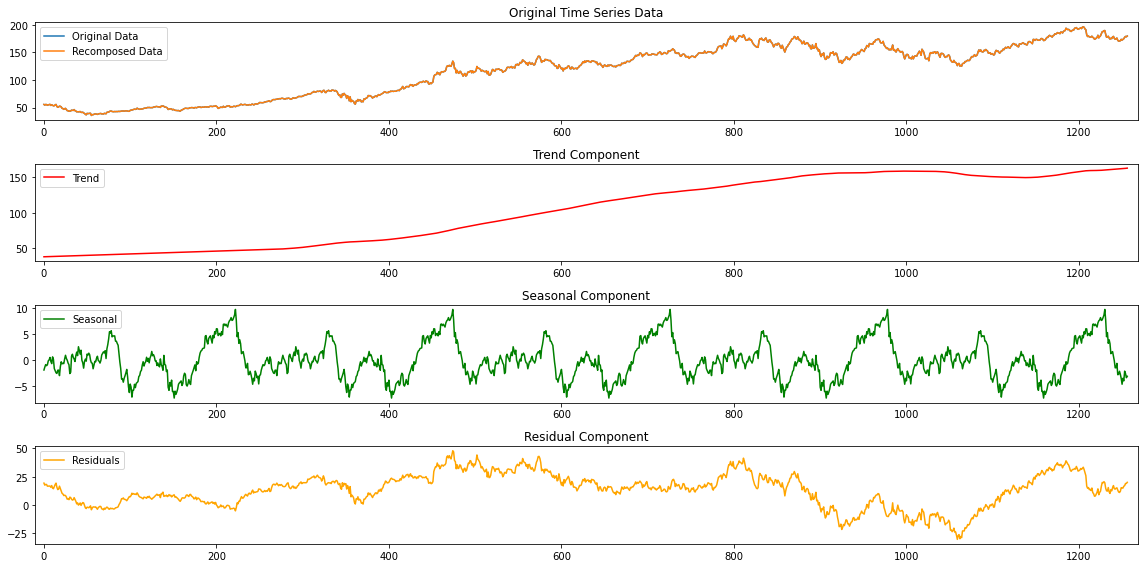

In [362]:
# Extract the time and value columns
time_series = np.array(range(len(df['Date'])))  # Replace with your time column name
values = df['Close']

# Perform seasonal decomposition
result = sm.tsa.seasonal_decompose(values, model='additive', period=252, extrapolate_trend=25, two_sided=False)

# Plot the original data, trend, seasonal, and residuals
plt.figure(figsize=(16, 8))
plt.subplot(4, 1, 1)
plt.plot(time_series, values, label='Original Data')
plt.plot(time_series, result.resid+result.trend+result.seasonal, label='Recomposed Data')
plt.xlim(-10,1268)
plt.legend()
plt.title('Original Time Series Data')

plt.subplot(4, 1, 2)
plt.plot(time_series, result.trend, label='Trend', color='red')
plt.xlim(-10,1268)
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(time_series, result.seasonal, label='Seasonal', color='green')
plt.xlim(-10,1268)
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(time_series, result.resid, label='Residuals', color='orange')
plt.xlim(-10,1268)
plt.legend()
plt.title('Residual Component')
plt.tight_layout()
plt.show()

# Test dataset

In [12]:
from dataset import SP_500
from torch.utils.data import DataLoader

dataset = SP_500('training_data')
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=0)

In [5]:
len(dataloader)

125

In [7]:
next(iter(dataloader)).size()

torch.Size([4, 1256, 5])

# Decomposition Testing

# Forecast Dev

In [389]:
df = pd.read_csv('training_data/NVDA.csv').drop(columns=['Adj Close'])

In [390]:
import torch
from rnn import LSTM
from forecast import forecast_pipeline

# Load model
kwargs, state = torch.load("models/rnn/weights/best.pth", map_location=torch.device("cuda:0"))
model = LSTM(**kwargs)
model.load_state_dict(state)
model.to("cuda:0")
model.eval()

decomposition, composition, effects_forecast, rnn_forecast = forecast_pipeline(df, model, 15, "cuda:0")
print(decomposition.keys(), '\n', effects_forecast.keys(), '\n')
print(df.iloc[-10:, 4], '\n')
print(composition.iloc[:, 5])

dict_keys(['data', 'trend', 'seasonality', 'residuals', 'dow_effect', 'final_row', 'minimums', 'maximums', 'input']) 
 dict_keys(['trend_forecast', 'seasonality_forecast']) 

1247    430.890015
1248    434.989990
1249    447.820007
1250    435.170013
1251    440.410004
1252    446.880005
1253    457.619995
1254    452.730011
1255    457.980011
1256    468.059998
Name: Close, dtype: float64 

0     463.715798
1     464.677907
2     461.365325
3     468.540669
4     464.077104
5     467.090037
6     468.402772
7     464.985366
8     472.026164
9     467.462779
10    470.421715
11    471.666328
12    468.306406
13    475.215936
14    470.734246
Name: Close, dtype: float64


In [387]:
composition

,Date,Open,High,Low,Volume,Close
0,2023-10-11,181.295033,183.676416,180.498978,8.918650e+07,182.729909
1,2023-10-12,181.257242,183.811926,180.450103,1.001544e+08,182.684059
2,2023-10-13,180.962748,183.437430,180.088306,8.244883e+07,182.323006
3,2023-10-16,182.034691,184.956960,181.493211,1.210205e+08,183.846866
4,2023-10-17,182.170494,184.820139,181.386770,1.333913e+08,183.411044
5,2023-10-18,182.217397,185.058295,181.597145,1.715394e+08,183.577679
6,2023-10-19,182.161639,185.178304,181.516537,1.679819e+08,183.616603
7,2023-10-20,181.843896,184.778508,181.148098,1.064409e+08,183.259880
8,2023-10-23,182.885445,186.336388,182.569853,1.826160e+08,184.802085
9,2023-10-24,183.003822,186.179239,182.455832,1.956648e+08,184.353464
